# Описание проекта

Описание данных

Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста
Описание проекта
Контекст
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.



# Шаг 1. Загрузим данные и подготовим их к анализу

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from datetime import datetime, timedelta
import datetime as dt
from scipy import stats as st
#import collections

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
#путь 

In [3]:
pd.set_option('display.max_colwidth', None)
#для вывода гепотиз полностью 

In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]
orders.columns = [x.lower() for x in orders.columns]
visitors.columns = [x.lower() for x in visitors.columns]
#преведем к нижниму регистру 

In [5]:
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders.head(10)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
transactionid,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorid,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,8.348006e+03,3.919113e+04,50.0,1.220000e+03,2.978000e+03,8.290000e+03,1.294500e+06


In [8]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [9]:
visitors.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


In [10]:
# получение общей информации о данных в таблицах
display(visitors.info())
display('-------')
display(orders.info())
display('-------')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'-------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'-------'

In [11]:
display(visitors.isna().sum())
display(orders.isna().sum())
#проверим на пропуски 

date        0
group       0
visitors    0
dtype: int64

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64

In [12]:
display(visitors.duplicated().sum())
display(orders.duplicated().sum())


0

0

Дубликаторв не обнаруженно 

## Вывод по превой главе 
Данные чистые, в предобработке не нуждаются 

# Приоритизация гипотез

In [13]:
hyp_data = hypothesis
hyp_data['ICE'] = (hyp_data['impact']*hyp_data['confidence'])/hyp_data['efforts']
display(hyp_data[['hypothesis','ICE']].sort_values(by='ICE',ascending=False))
#ICE 

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По фреймворку ICE лидируют гипотезы 8,0,7

In [14]:
hyp_data['RICE'] = (hyp_data['reach']*hyp_data['impact']*hyp_data['confidence'])/hyp_data['efforts']
display(hyp_data[['hypothesis','RICE']].sort_values(by='RICE',ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По фреймворку RICE лидируют гипотезы 7,2,0

In [15]:
display(hyp_data)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


## Вывод по приоритезации гипотез

Наиболее приоритетный гепотизы для нас 7,2,0 т.к в фрйемворке ICE в отличии от RICE не учитывается  охват изменений 

# Анализ A/B-теста

In [16]:
visitors['group'].unique()


array(['A', 'B'], dtype=object)

В тесте участвуют две группы А и В 

In [17]:
display('Кол-во в группе gпользователей в группах',orders['group'].value_counts())

'Кол-во в группе gпользователей в группах'

B    640
A    557
Name: group, dtype: int64

In [18]:
#сменим тип данных 
visitors['date'] = visitors['date'].astype('datetime64[D]')
orders['date'] = orders['date'].astype('datetime64[D]')
#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))
# перевём столбец date в формат для работы с датой и временем
#visitors['date'] = pd.to_datetime(visitors['date']).astype('datetime64[D]')
#orders['date'] = pd.to_datetime(orders['date']).astype('datetime64[D]')


print('\nДата начала эксперемента {}\nконечная дата {}\n'.format( visitors['date'].min(),visitors['date'].max()))



Дата начала эксперемента 2019-08-01 00:00:00
конечная дата 2019-08-31 00:00:00



Тест проводился ровно месяц

In [19]:
orders['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

Кол-во пользователей в группах  
А  - 557  
В - 650


In [20]:
orders['visitorid'].value_counts()


4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorid, Length: 1031, dtype: int64

Кол-во ункальных пользователей до фильтрации, проверим нет ли пользователей который попали в обе группы 

In [21]:
duplicates_users = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique())
duplicates_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [22]:
orders = orders.query('visitorid not in @duplicates_users')

In [23]:
orders['visitorid'].value_counts()

611059232     3
2742574263    3
3908431265    3
3967698036    3
2988190573    3
             ..
2328378067    1
4174346527    1
1555048873    1
3540744920    1
3013339133    1
Name: visitorid, Length: 973, dtype: int64

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Массив уникальных пар значений дат и групп теста 

### Соберем агрегированные кумулятивные по дням данные о заказах

In [25]:
ordersAggregated = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date']<=x['date'],orders['group']==x['group'])].agg({
    'date':'max',
    'group':'max',
    'transactionid': pd.Series.nunique,
    'visitorid':pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ordersAggregated

,date,group,transactionid,visitorid,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [26]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [27]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData
#объеденим данные и присвоим новые названия

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


## Кумулятивная выручка по дням.
**Построим график кумулятивной выручки по дням и группам A/B-тестирования**

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [29]:
cumulativeRevenueB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 61
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     31 non-null     datetime64[ns]
 1   revenue  31 non-null     int64         
 2   orders   31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


In [30]:
cumulativeRevenueA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 60
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     31 non-null     datetime64[ns]
 1   revenue  31 non-null     int64         
 2   orders   31 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 992.0 bytes


In [31]:
# перевём столбец date в формат для работы с датой и временем
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

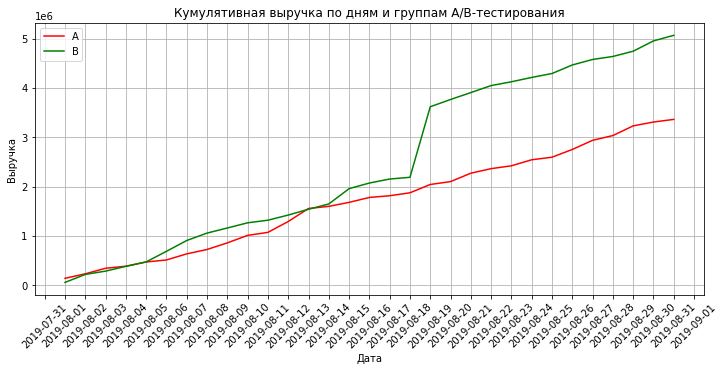

In [32]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],'r',label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],'g',label='B')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.title('Кумулятивная выручка по дням и группам A/B-тестирования')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend()

* В начале выручка увеличивается равномерно  
* Выручка группы В больше группы А  
* 18 числа выручка группы В реко увиличевается возможно в это время либо увеличилось кол-во заказов или дорогие заказы  
* Посмотрим какие заказы были в этом промежутке 

In [33]:
cumulativeRevenueB.query('date >= "2019-08-15" and date <= "2019-08-20"')

,date,revenue,orders
29,2019-08-15,1960427,289
31,2019-08-16,2074677,307
33,2019-08-17,2155542,320
35,2019-08-18,2190865,327
37,2019-08-19,3620785,348
39,2019-08-20,3768059,368


In [34]:
cumulativeRevenueA.query('date >= "2019-08-15" and date <= "2019-08-20"')

,date,revenue,orders
28,2019-08-15,1682569,241
30,2019-08-16,1782420,259
32,2019-08-17,1817160,265
34,2019-08-18,1876741,278
36,2019-08-19,2044934,299
38,2019-08-20,2103613,309


* В группе В 08.19 и 08.20 были заказы больше 300 тыс , в то же время в группе А в это же время заказы по 200 тысяч 

## Кумулятивный средний чек.
**Построим график кумулятивного среднего чека по группам.**

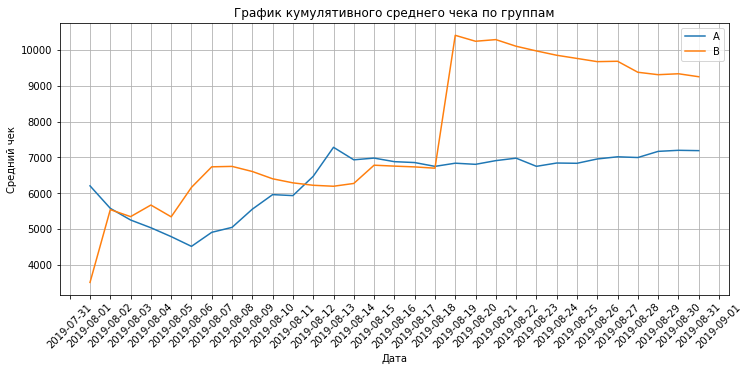

In [35]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend();

* В начале в группе А палание среднего чека к концу теста он выравнивается 
* В группе В есть резкий скачаок как раз 19 числа когда были крупные заказы к концу он так же выравнивается 

**Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

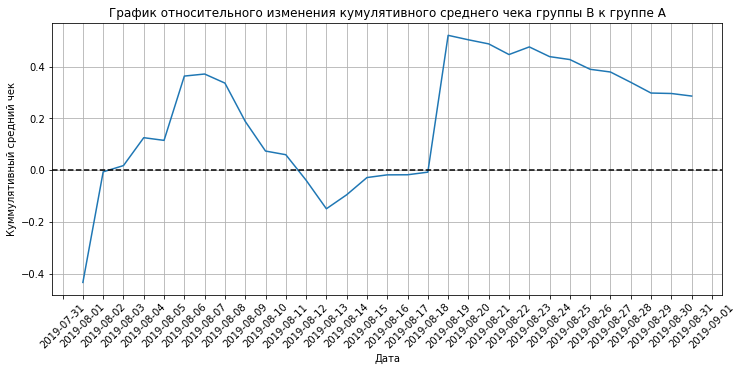

In [36]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Куммулятивный средний чек')
plt.grid()
plt.show()

* Появились небольшие всплески с 4 - 9 число, а так же те самые крупные заказы от 19 числа

## Кумулятивная конверсия.
**Построим график кумулятивной конверсии по группам.**

In [37]:
cumulativeData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   orders    62 non-null     int64         
 3   buyers    62 non-null     int64         
 4   revenue   62 non-null     int64         
 5   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 3.4+ KB


* Сегмет по началу имел более выскоую конверсию, далее группа В показывала стабильно результат выше 

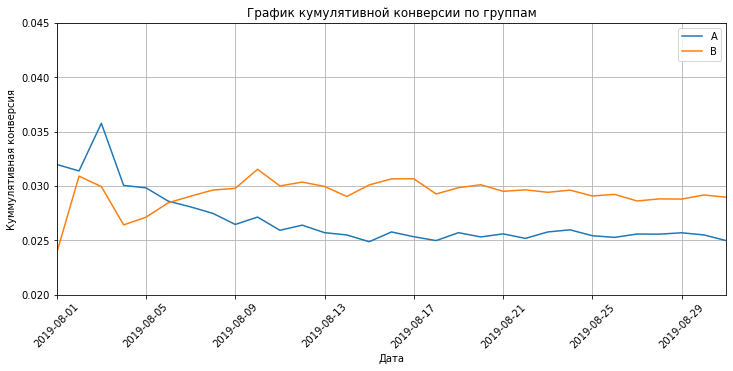

In [38]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
plt.ylim([0.02, 0.04])
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятивная конверсия')
plt.grid()
plt.legend()
import datetime
plt.axis([datetime.date(2019, 8, 1), datetime.date(2019, 8, 31),0.020, 0.045]);


* В начале так же есть скачок гуппы А , длаее группа В показывает результат лучше 

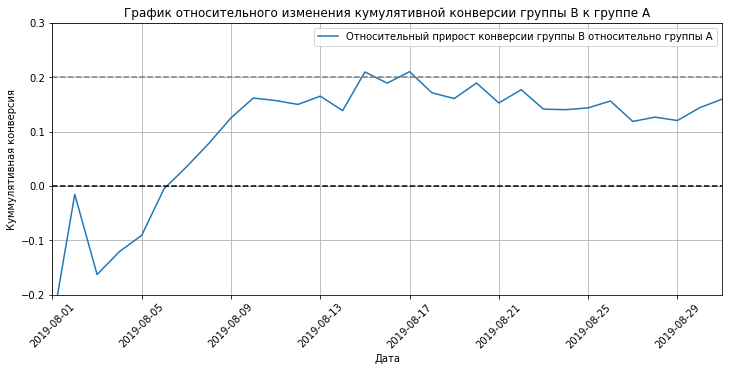

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Куммулятивная конверсия')
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([datetime.date(2019, 8, 1), datetime.date(2019, 8, 31), - 0.2, 0.3]);

* В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Её конверсия имела плавный рост и затем было небольшое снижение.

## Количество заказов по пользователям.
**Подсчитаем количество заказов по пользователям.**

In [40]:
cnt_orders = orders.groupby('visitorid',as_index=False).agg({'transactionid':'nunique'}).sort_values(by='transactionid', ascending=False)
cnt_orders.columns = ['visitor_id', 'orders_count']

In [41]:
cnt_orders.head()

,visitor_id,orders_count
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


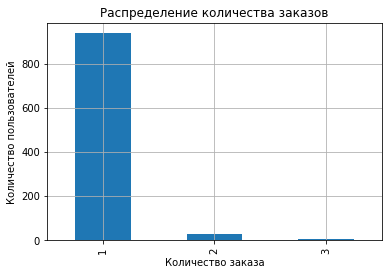

In [42]:
cnt_orders['orders_count'].value_counts().plot(kind='bar')
plt.figsize=(10,4)
plt.grid()
plt.title('Распределение количества заказов')
plt.xlabel('Количество заказа')
plt.ylabel('Количество пользователей')
plt.show();

* В оснновном пользователи делали 1 заказ редко 2 и больше 

**Построим точечную диаграмму числа заказов на одного пользователя.**

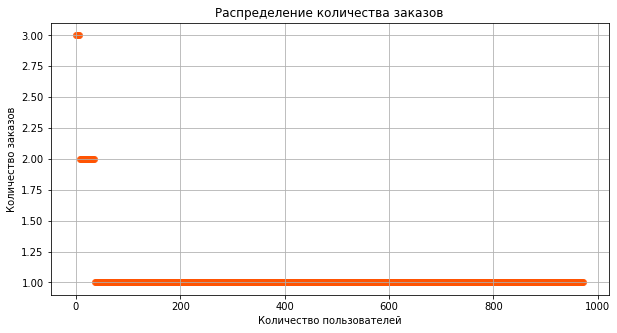

In [43]:
x_values = pd.Series(range(0, len(cnt_orders['orders_count'])))
plt.figure(figsize=(10,5))
plt.scatter(x_values, cnt_orders['orders_count'], color='#FF5403', alpha=0.5)
plt.grid()
plt.title('Распределение количества заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.show();

* В основном пользовтели делают 1 заказ, крайне редко 2 и больше

**Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [44]:
print(np.percentile(cnt_orders['orders_count'], [95, 99])) 

[1. 2.]


* 95% пользовтелей сделали 1 заказ и только 1% сделал 2 два заказа
За границу стоит брать порог не выше 2 заказов, все остальное отнесем к анамалиям 

**Построим график стоимости заказов** 

In [45]:
print('\nМедиана {},\nСреднее {},\nМаксимум {},\nМинимум {},\nМода{}'
      .format(orders['revenue'].median(),orders['revenue'].mean(),
                                                          orders['revenue'].max(),orders['revenue'].min(),orders['revenue'].mode()))



Медиана 2955.0,
Среднее 8300.814960629921,
Максимум 1294500,
Минимум 50,
Мода0    990
dtype: int64


* Большиносво заказов до 100000 , но есть и эксремальные заказы и на 50 и на 1294500  
Попробывал поигратся с модой, но что то не уверен в реальности это числа

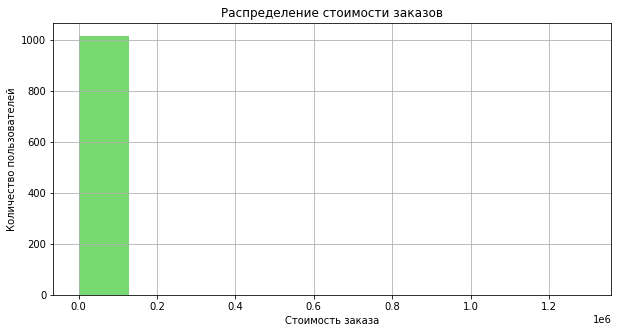

In [46]:
plt.figure(figsize=(10,5))
plt.hist(orders['revenue'], color='#77D970')
plt.grid()
plt.title('Распределение стоимости заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')
plt.show();

График подтверждает вывод выше 

**Построим точечный график стоимостей заказов.**

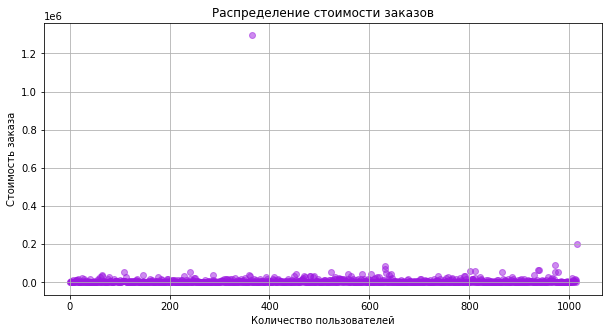

In [47]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'], color='#9C19E0', alpha=0.5)
plt.grid()
plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.show();

**Ограничим ось Y, чтобы убрать явные выбросы и проверить появятся ли новые.**

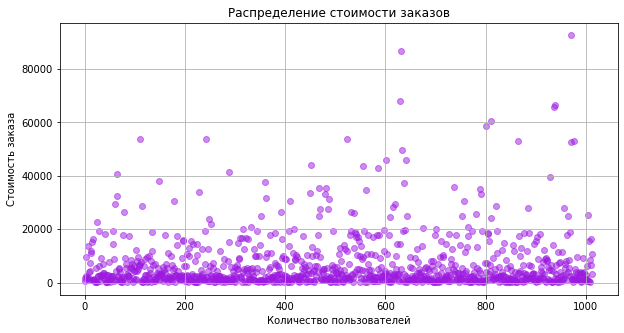

In [48]:
new_orders = orders.query('revenue < 200000')
x_values = pd.Series(range(0, len(new_orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, new_orders['revenue'], color='#9C19E0', alpha=0.5)
plt.grid()
plt.title('Распределение стоимости заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.show();

* Большинство заказов до 20 тысяч рублей. В этом дипазоне выбросами считаются заказы больше 80 тысяч рублей. Для определения более точной границы аномальных значений рассчитаем процентили.

In [49]:
print(np.percentile(orders['revenue'], [ 95, 99]))

[26785. 53904.]


* Не более 5% заказов дороже 27 тысяч и только 1% дороже 54 тысяч 

In [50]:
orders

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


## Cтатистическая значимость различий в конверсии и в среднем чеке.
**Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.**

In [51]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']


visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
print(data.head(3)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               288850               507   

   visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB  
0               713                   719                   713  
1               581                  1338                  1294  
2               509            

* Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

* Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

* Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1.

**Сформулируем гипотезы:**

H₀ - статистически значимых различий в конверсии по "сырым" данным между группами нет.

H₁ - статистически значимые различия в конверсии по "сырым" данным между группами есть.

In [52]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')
[ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')]

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

print('alpha = 0.05')
print('p-value = ', (st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный проигрыш группы B = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

alpha = 0.05
p-value =  0.011018084110014696
Относительный проигрыш группы B = 0.160


* p-value меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. 
* По «сырым» данным различия в конверсии групп A и B есть. А относительный выигрыш группы B равен 16.0% .

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.** 

**Сформулируем гипотезы:**

H₀ - в среднем чеке нет различий между группами по "сырым" данным.

H₁ - в среднем чеке есть различия между группами по "сырым" данным.

In [53]:
print('alpha = 0.05')
print('p-value = ', (st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный проигрыш группы B = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value =  0.8294908998149533
Относительный проигрыш группы B = 0.287


* p-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Различие среднего чека между группами всего 2.8%.

**Cтатистическая значимость различий в конверсии между группами по «очищенным» данным.**

* Примем за аномальных пользователей тех, кто совершил больще 2 заказов или совершил заказ дороже 58233.2 рублей. 
* Узнаем, сколько всего аномальных пользователей методом shape().

In [54]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233.2]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
dtype: int64
16


* Всего 16 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. 


* Подготовим выборки количества заказов по пользователям по группам теста.

**Сформулируем гипотезы:**

H₀ - статистически значимых различий в конверсии по "очищенным" данным между группами нет.

H₁ - статистически значимые различия в конверсии по "очищенным" данным между группами есть.

In [55]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

# применим статистический критерий Манна-Уитни к полученным выборкам
print('alpha = 0.05')
print('p-value = ', (st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный проигрыш группы B = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value =  0.007021302207652193
Относительный проигрыш группы B = 0.189


* Результаты по конверсии практически не изменились. Проверим изменилось ли что-нибудь с результатами по среднему чеку.

**Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

**Сформулируем гипотезы:**

H₀ - в среднем чеке нет различий между группами по "очищенным" данным.

H₁ - в среднем чеке есть различия между группами по "очищенным" данным.

In [56]:
print('alpha=0.05')
print(
    'p-value = ', (
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)


print(
    'Относительный проигрыш группы B = {0:.3f}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

alpha=0.05
p-value =  0.7877044862440841
Относительный проигрыш группы B = -0.032


* P-value уменьшился, разница между сегментами сократилась с 28% до 3%.  Такой пример хорошо показывает, как сильно выбросы могут влиять на результаты A/B-теста.

# Выводы:

1. По «сырым» и "очищенным "данным есть различия в конверсии групп A и B. Выигрыш группы B относительно группы А по "сырым" данным равен 16.0%, а по "очищенным" 18,9%.

2. Различия между группами по среднему чеку между группами по "сырым" данным - 28.7%, а по "очищенным" - 3%. После очистки выбросов чеки сравнялись. Следовательно, различия в средних чеках групп A и B отстутствуют.

3. Принято решение остановить тестирование и признать успех группы B. Конверсия группы B значительно выше конверсии группы A, не смотря на то, что разницы в средних чеках нет. Конверсия является важным показателем и влияет на выручку.